# Chapter 3
In this chapter we take a closer look at neuroelectro data, and we also look at the quality of chapter 1 optimizer fits from this perspective

In [chapter 4](chapter4.ipynb) (a closely related notebook see hyperlink) We will take a closer using Docker environments to access commonly used simulator backends NEURON/PyNN/Allen Glif/Brian and waveform feature extraction tools: EFEL, Allen etc.

In [1]:
from neuronunit.optimisation.optimization_management import data_versus_optimal

consider installing pynn a heavier backend
glif python Error


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0],[1])
plt.show()
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
result_RAW = pickle.load(open('RAWall_data_tests.p','rb'))
result_ADEXP = pickle.load(open('ADEXPall_data_tests.p','rb'))
result_RAW = result_RAW['RAW']


In [3]:
#type(result_ADEXP['ADEXP']['olf'][0])
ad_olf_dtc = result_ADEXP['ADEXP']['olf'][0].dtc
ad_purkine_dtc = result_ADEXP['ADEXP']['purkine'][0].dtc
ad_ca1pyr_dtc = result_ADEXP['ADEXP']['ca1pyr'][0].dtc
ad_ca1basket_dtc = result_ADEXP['ADEXP']['ca1basket'][0].dtc
ad_neo_dtc = result_ADEXP['ADEXP']['neo'][0].dtc

In [4]:
#type(result_ADEXP['ADEXP']['olf'][0])
olf_dtc = result_RAW['olf'][0]
purkine_dtc = result_RAW['purkine'][0]
ca1pyr_dtc = result_RAW['ca1pyr'][0]
ca1basket_dtc = result_RAW['ca1basket'][0]
neo_dtc = result_RAW['neo'][0]


RAW_dtc = {}
ADEXP_dtc = {}
#type(result_ADEXP['ADEXP']['olf'][0])
RAW_dtc = {}
RAW_dtc['Cerebellum Purkinje cell'] = result_RAW['purkine']
RAW_dtc['Olfactory bulb (main) mitral cell'] = result_RAW['olf']
RAW_dtc['Hippocampus CA1 pyramidal cell'] = result_RAW['ca1pyr']
RAW_dtc['Neocortex pyramidal cell layer 5-6'] = result_RAW['neo']
RAW_dtc['Hippocampus CA1 basket cell'] = result_RAW['ca1basket']

ADEXP_dtc = {}
ADEXP_dtc['Cerebellum Purkinje cell'] = [d.dtc for d in result_ADEXP['ADEXP']['purkine']]
ADEXP_dtc['Olfactory bulb (main) mitral cell'] = [d.dtc for d in result_ADEXP['ADEXP']['olf']]
ADEXP_dtc['Hippocampus CA1 pyramidal cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1pyr']]
ADEXP_dtc['Neocortex pyramidal cell layer 5-6'] = [d.dtc for d in result_ADEXP['ADEXP']['neo']]
ADEXP_dtc['Hippocampus CA1 basket cell'] = [d.dtc for d in result_ADEXP['ADEXP']['ca1basket']]





In [5]:
rts,complete_map = pickle.load(open('../tests/russell_tests.p','rb'))


In [6]:
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
import urllib.request, json
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os


import pandas

try:
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')
except:
    !wget https://neuroelectro.org/static/src/article_ephys_metadata_curated.csv
    ne_raw = pandas.read_csv('article_ephys_metadata_curated.csv', delimiter='\t')

hip = ne_raw[ne_raw['NeuronName'].str.match('Hippocampus CA1 pyramidal cell')]
here = ne_raw[ne_raw['TableID']==18]

from scipy.signal import find_peaks_cwt


from neuronunit import tests as _, neuroelectro
from neuronunit.tests import passive, waveform, fi
from neuronunit.tests.fi import RheobaseTestP
from neuronunit.tests import passive, waveform#, druckmann2013
import sciunit
from neuronunit.tests import bi_modal_test as bmt
import quantities as pq
import seaborn

try:
    with open('specific_test_data.p','rb') as f:
        contents = pickle.load(f)
        cell_name_map = contents[1]
        neuron_values = contents[0]
except:
    neuron_values, cell_name_map = bmt.specific_properties(name_map,test_map)
    with open('specific_test_data.p','wb') as f:
        pickle.dump(f,[neuron_values, cell_name_map])

test_map = {1:'CapacitanceTest',2:'InputResistanceTest',3:'RestingPotentialTest',4:'TimeConstantTest',\
            5:'InjectedCurrentAPAmplitudeTest',6:'InjectedCurrentAPWidthTest',\
            7:'InjectedCurrentAPThresholdTest',8:'RheobaseTest'}

units_map = {1:pq.pF,2:pq.MOhm,3:pq.mV,4:pq.ms,\
            5:pq.mV,6:pq.ms,\
            7:pq.mV,8:pq.pA}

complete_map = {}
for k,v in units_map.items():
    complete_map[test_map[k]] = units_map[k]

name_map ={}
name_map["Cerebellum Purkinje cell"] = "sao471801888"
name_map["Dentate gyrus basket cell"] = "nlx_cell_100201"
name_map["Hippocampus CA1 basket cell"] = "nlx_cell_091205"
name_map["Neocortex pyramidal cell layer 5-6"] = "nifext_50"
name_map["Olfactory bulb (main) mitral cell"] = "nlx_anat_100201"
name_map["Hippocampus CA1 pyramidal cell"] = "sao830368389"
#ax = sns.violinplot(x="day", y="total_bill", data=tips)
inv_name_map = {v: k for k, v in name_map.items()}
executable_tests = {}
russell_tests = {}




## Below is instructions for making NU tests used in Chapter1.

``` python

for tt in test_classes:
    if test_map[i] in str(tt):

        ipe_tests_path = str(os.getcwd())+'/pipe_tests.p'
        assert os.path.isfile(pipe_tests_path) == True
        with open(pipe_tests_path,'rb') as f:
            pipe_tests = pickle.load(f)

        t = tt()
        t.observation = {}
        t.observation['mean'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['value'] = neuron_values[nlex_ids][i]['modes'][0]*units_map[i]
        t.observation['std'] = neuron_values[nlex_ids][i]['std']*units_map[i]
        t.observation['n'] = neuron_values[nlex_ids][i]['n']
        executable_tests[cell_name][test_map[i]] =  t
        print(test_map[i],t.name)

        assert test_map[i] == t.name
        executable_tests[cell_name][test_map[i]].data = None
        executable_tests[cell_name][test_map[i]].data = neuron_values[nlex_ids][i]['values']
```


# In the cells below we show experimental/model agreement
In terms of tests centered about modes of data distributions

In [7]:
# ADEXP_dtc
RAW_dtc['Cerebellum Purkinje cell'][0].tests['CapacitanceTest'].observation

{'value': array(613.684) * pF,
 'mean': array(613.684) * pF,
 'n': 111,
 'std': array(9205.26) * pF}

In [8]:
#import matplotlib.pyplot as plt
#%inline

%matplotlib inline
import matplotlib.pyplot as plt
# Make the figures big enough for the optically challenged.
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import pylab
import seaborn as sns


def plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,pop_dtc):
    for nlex_ids,values in neuron_values.items():
        cell_name = inv_name_map[nlex_ids]

        executable_tests[cell_name] = {}#[test_map[i]]
        #russell_tests[cell_name] = {}
        for i in neuron_values[nlex_ids].keys():
            neuron_values[nlex_ids][i]['modes'] = []
            if test_map[i] in pop_dtc[cell_name][0].predictions.keys():
                temp = pop_dtc[cell_name][0].predictions[test_map[i]]
                takefirst = list(temp.keys())[0]
                opt_found = float(temp[takefirst].rescale(units_map[i]))
            else:
                continue
            if pop_dtc[cell_name][0].scores[test_map[i]]<0.90:
                data = sorted(neuron_values[nlex_ids][i]['values'])
                data = [ float(d*units_map[i]) for d in data ]
                plt.clf()

                fig, ax = plt.subplots(4,1)
                ax[0].title.set_text('test name: '+str(test_map[i])+'Cell type: '+str(cell_name))
                ax[0] = sns.violinplot(data=data, palette="Set2", split=True,
                             scale="count", inner="stick",orient="h")
                ax[0].axvline(x=opt_found,linewidth=2, color='r',label='opt found')
                n, bins, patches = ax[1].hist(data, label=str(cell_name)+str(test_map[i]))
                half = (bins[1]-bins[0])/2.0

                mode0 = (bins[np.where(n==np.max(n))[0][0]]+half)*units_map[i]

                ax[0].axvline(x=mode0,linewidth=2, color='b',label='used as reference')

        
                # the histogram of the data
                ax[1].title.set_text('opt score: '+str(pop_dtc[cell_name][0].scores[test_map[i]]))
                ax[1].axvline(x=opt_found,linewidth=2, color='r')

                ax[1].axvline(x=mode0,linewidth=2, color='b')


                ax[2].boxplot(data,vert=False)
                ax[2].axvline(x=opt_found,linewidth=2, color='r')
                ax[2].axvline(x=mode0,linewidth=2, color='b')

                plt.xlabel('units: '+str(units_map[i]))

                plt.ylabel('Expected value: ')#+str(units_map[i]))
                plt.legend()
                plt.show()

                mode0 = bins[np.where(n==np.max(n))[0][0]]+half
                neuron_values[nlex_ids][i]['modes'].append(mode0)



            try:

                mode1 = bins[np.where(n==sorted(n)[-2])[0][0]]
                neuron_values[nlex_ids][i]['modes'].append(mode1)

            except:
                pass


<Figure size 720x576 with 0 Axes>

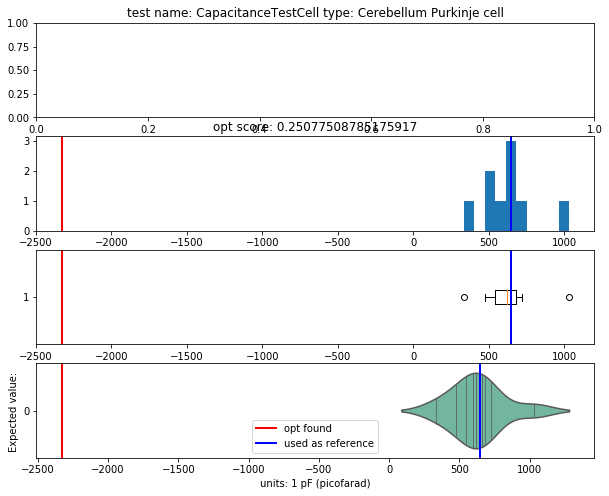

<Figure size 720x576 with 0 Axes>

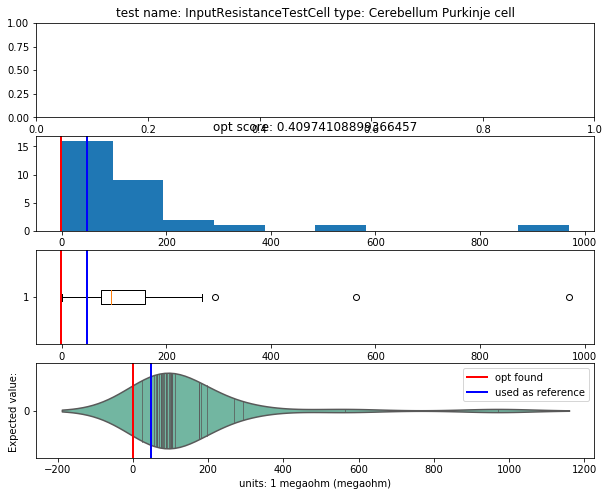

<Figure size 720x576 with 0 Axes>

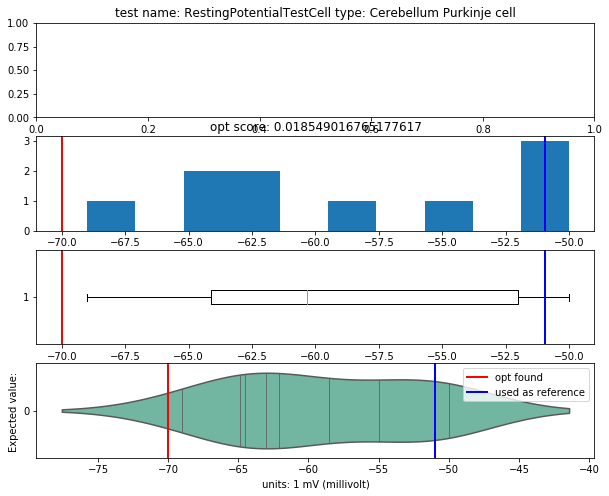

<Figure size 720x576 with 0 Axes>

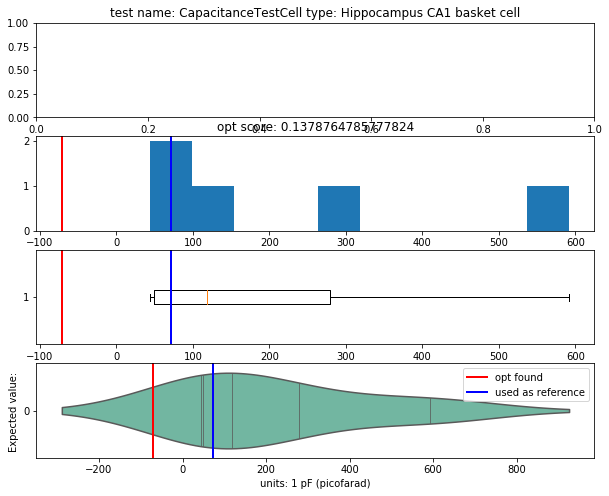

<Figure size 720x576 with 0 Axes>

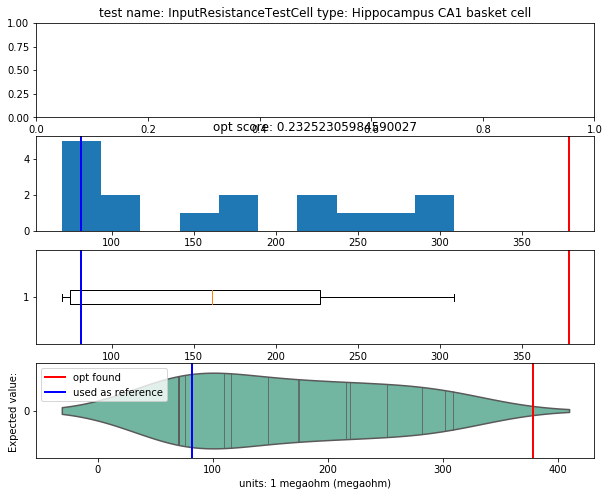

<Figure size 720x576 with 0 Axes>

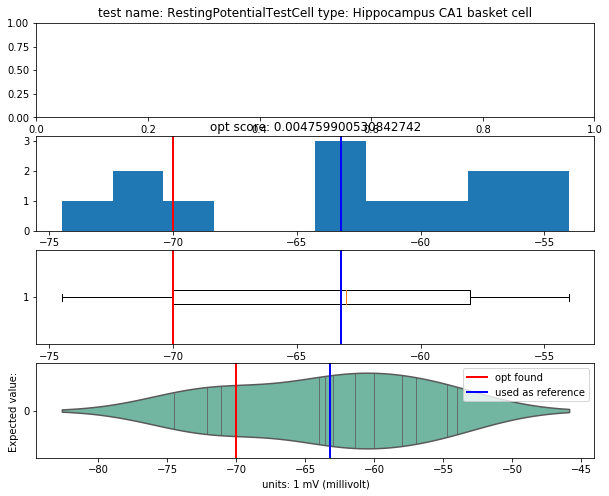

<Figure size 720x576 with 0 Axes>

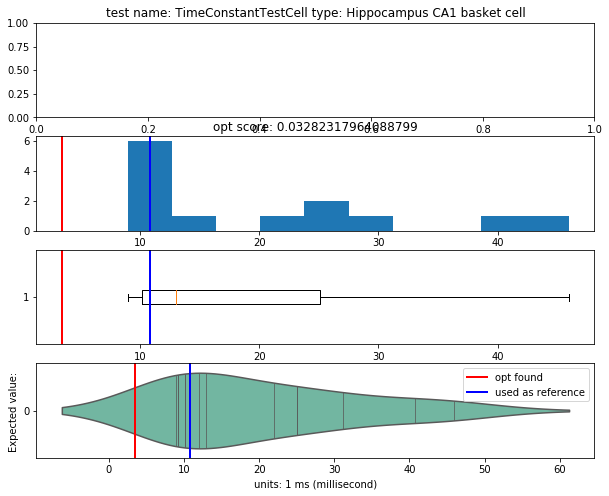

<Figure size 720x576 with 0 Axes>

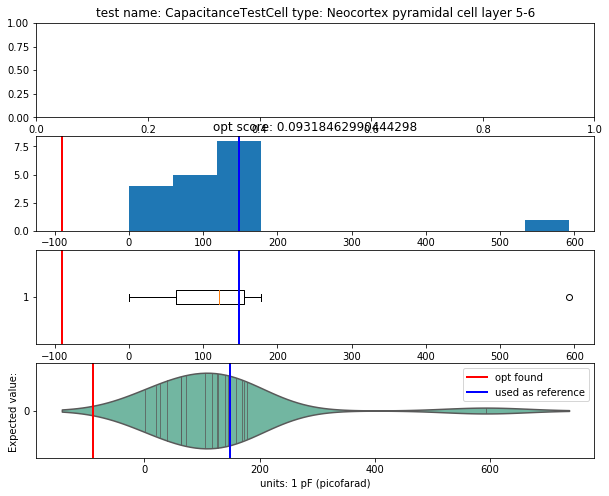

<Figure size 720x576 with 0 Axes>

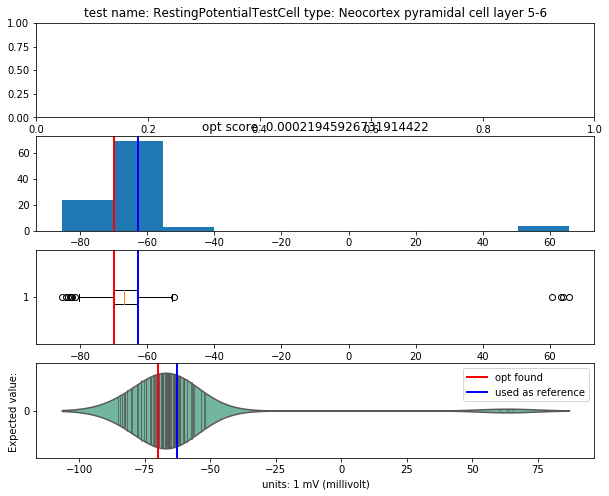

<Figure size 720x576 with 0 Axes>

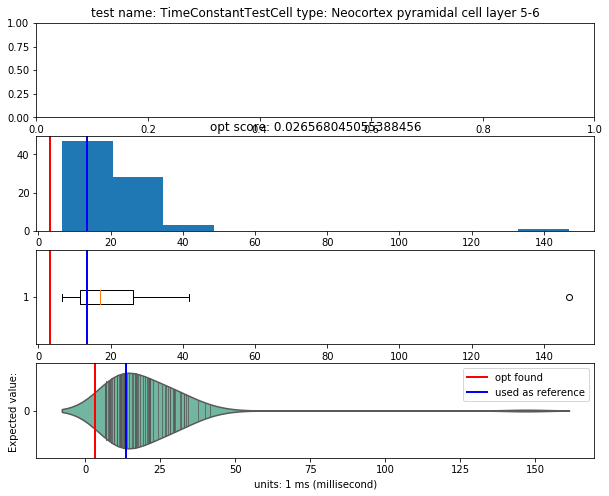

<Figure size 720x576 with 0 Axes>

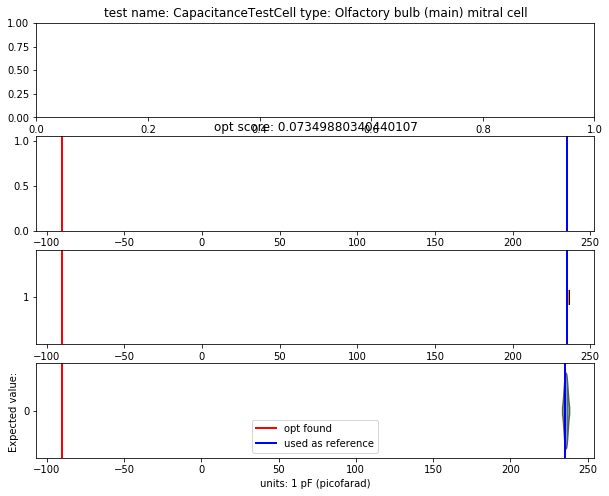

<Figure size 720x576 with 0 Axes>

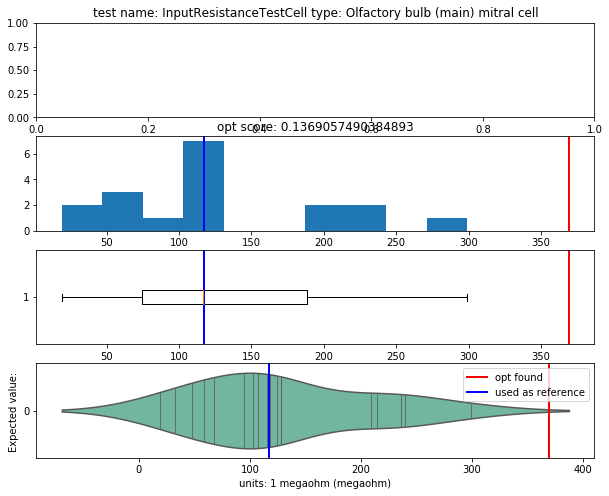

<Figure size 720x576 with 0 Axes>

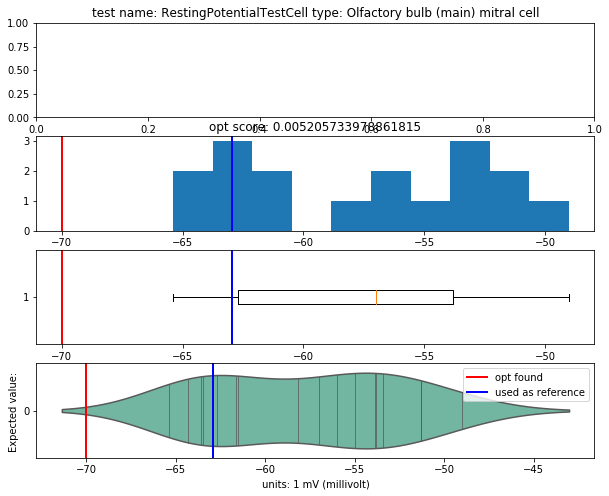

<Figure size 720x576 with 0 Axes>

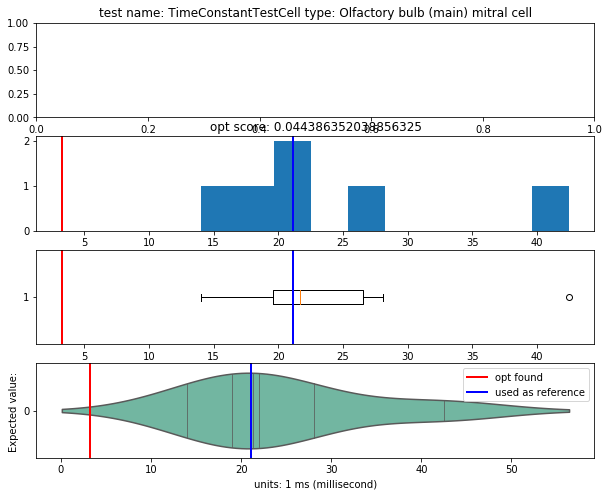

<Figure size 720x576 with 0 Axes>

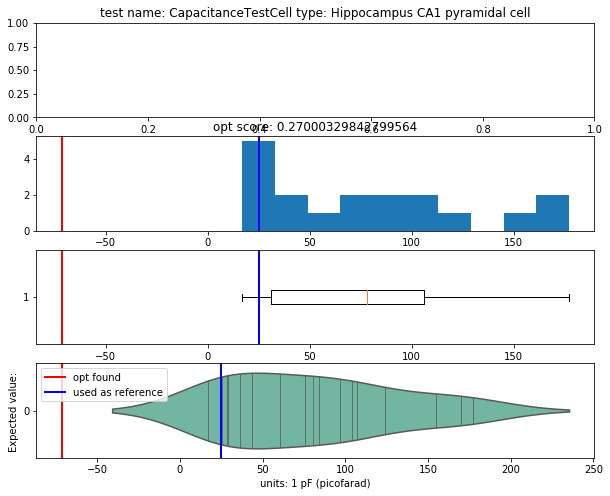

<Figure size 720x576 with 0 Axes>

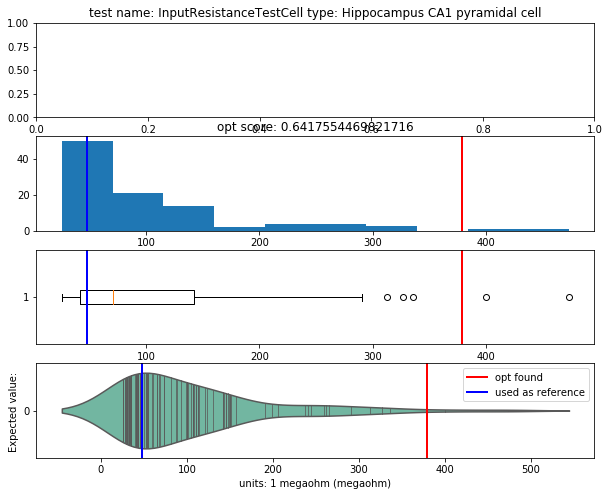

<Figure size 720x576 with 0 Axes>

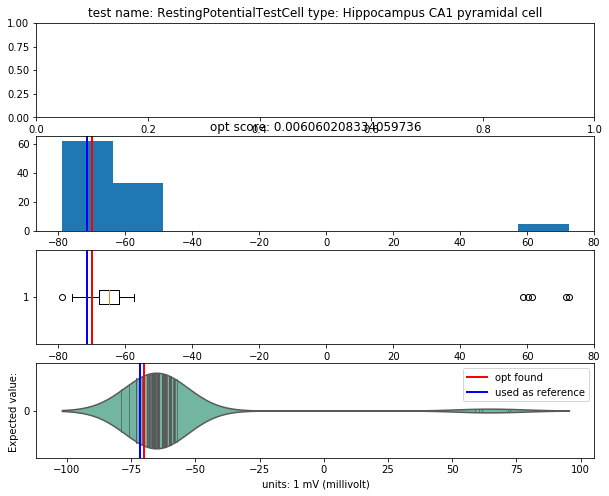

<Figure size 720x576 with 0 Axes>

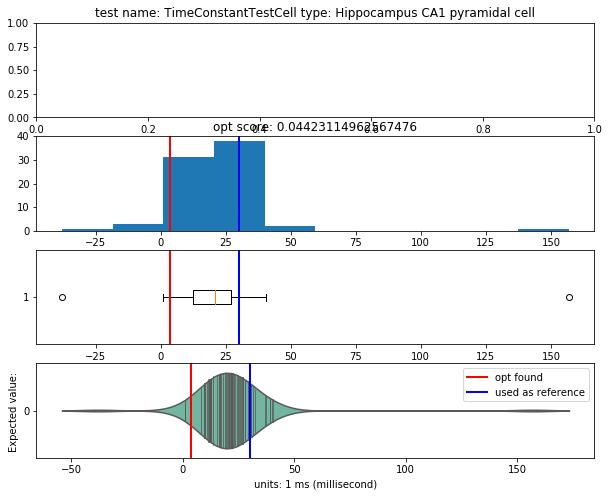

In [9]:
plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,ADEXP_dtc)

<Figure size 720x576 with 0 Axes>

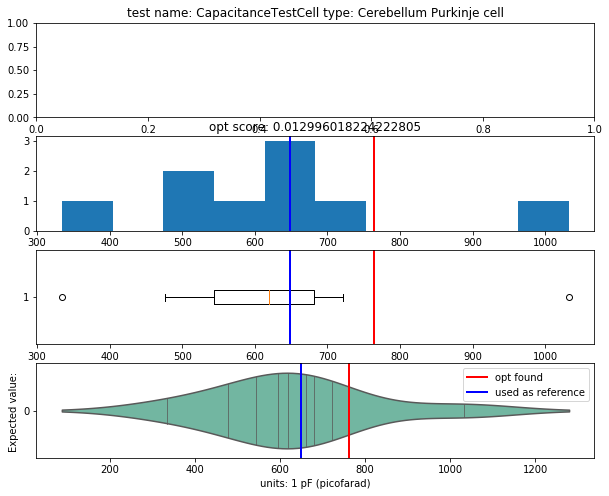

<Figure size 720x576 with 0 Axes>

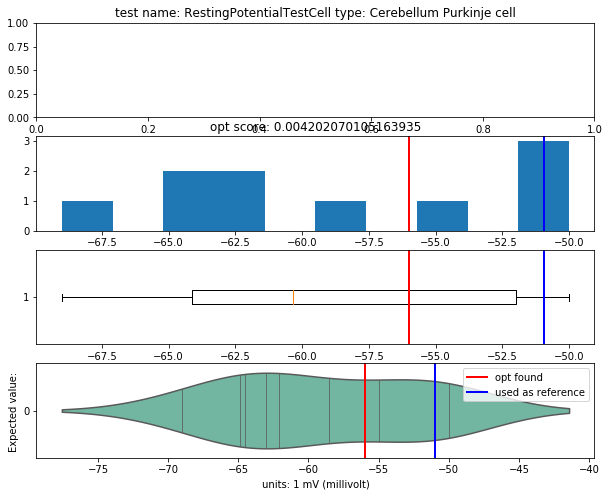

<Figure size 720x576 with 0 Axes>

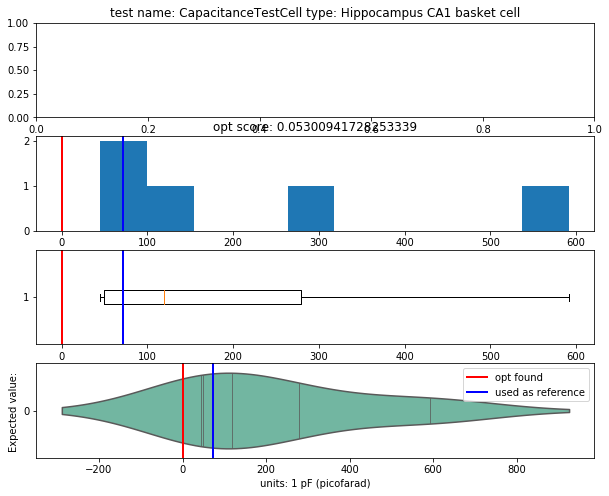

<Figure size 720x576 with 0 Axes>

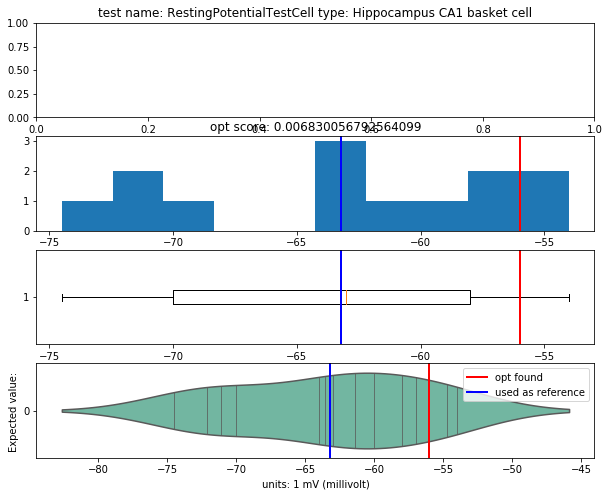

<Figure size 720x576 with 0 Axes>

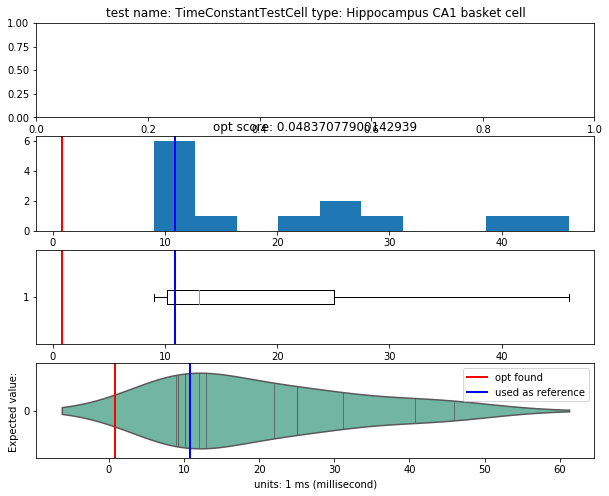

<Figure size 720x576 with 0 Axes>

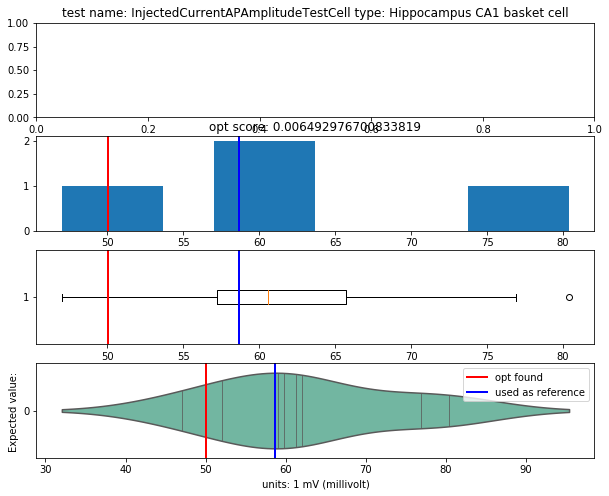

<Figure size 720x576 with 0 Axes>

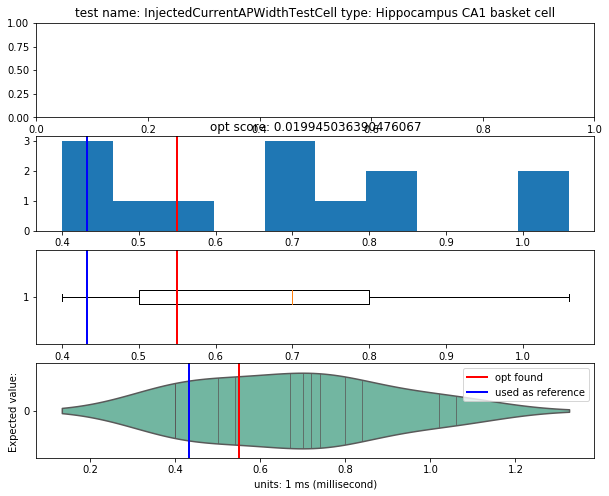

<Figure size 720x576 with 0 Axes>

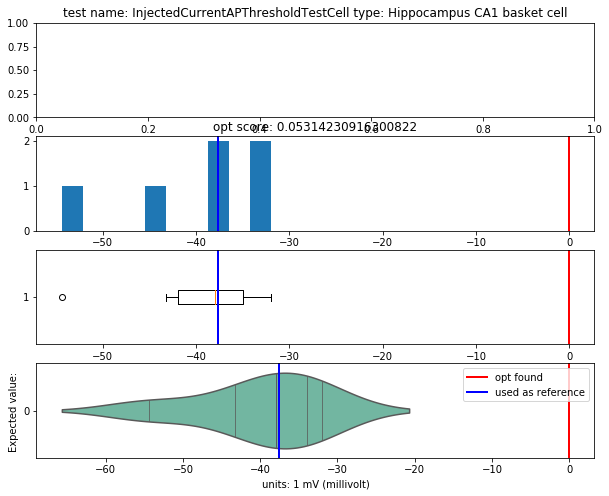

<Figure size 720x576 with 0 Axes>

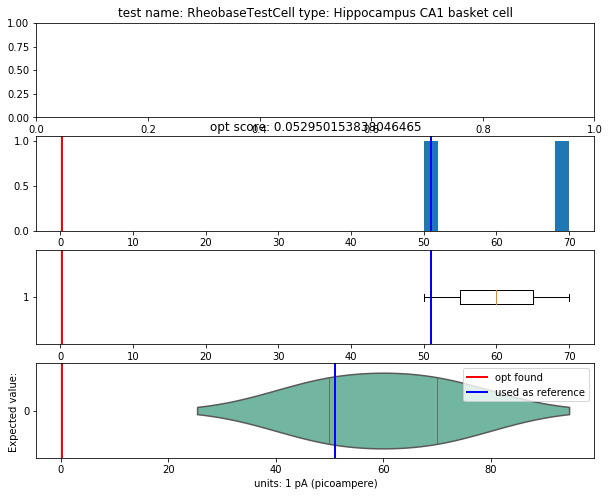

<Figure size 720x576 with 0 Axes>

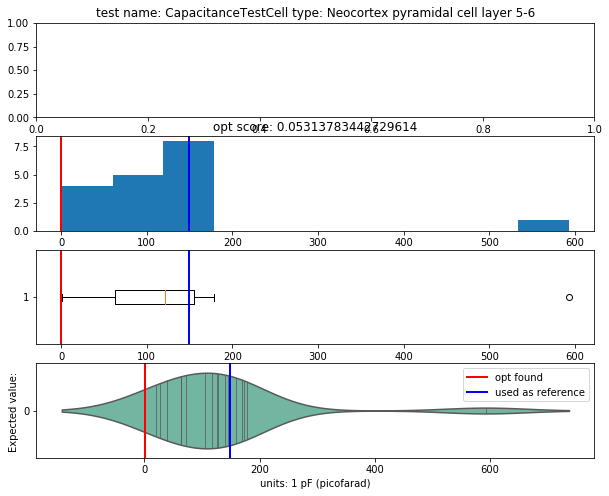

<Figure size 720x576 with 0 Axes>

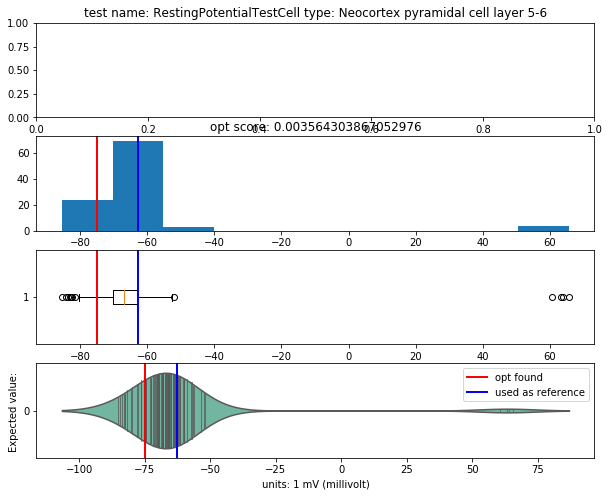

<Figure size 720x576 with 0 Axes>

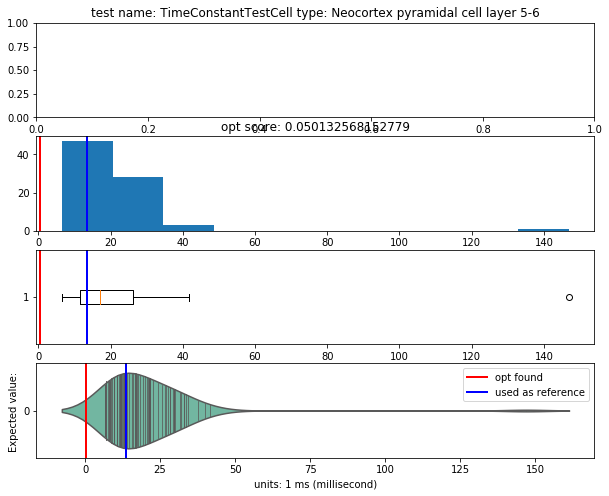

<Figure size 720x576 with 0 Axes>

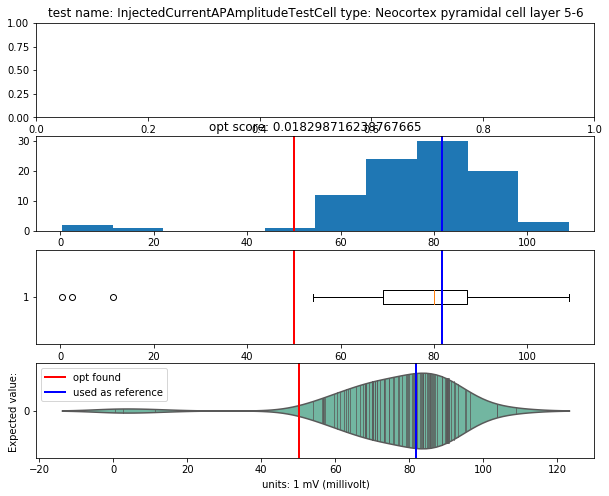

<Figure size 720x576 with 0 Axes>

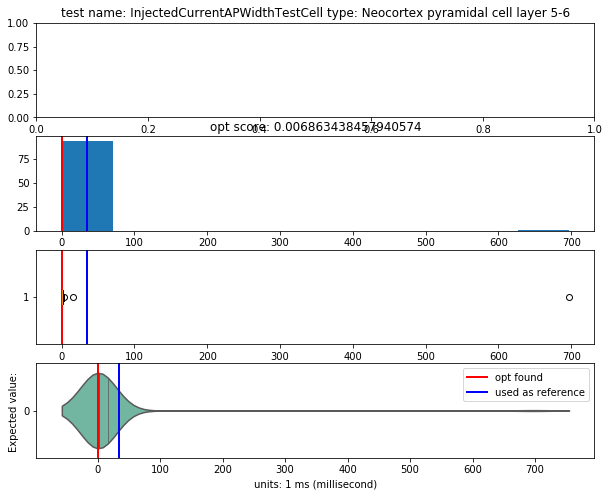

<Figure size 720x576 with 0 Axes>

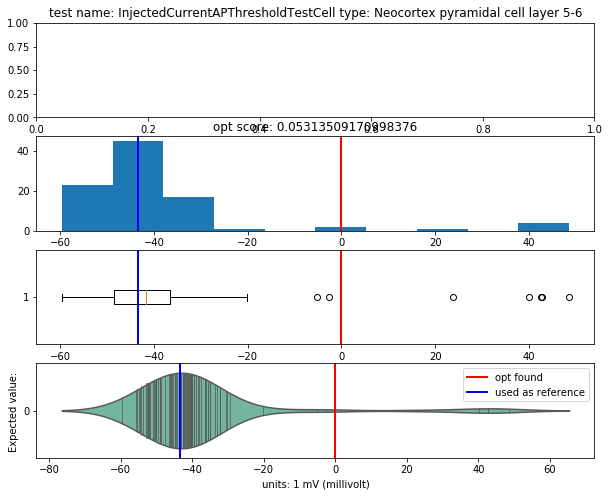

<Figure size 720x576 with 0 Axes>

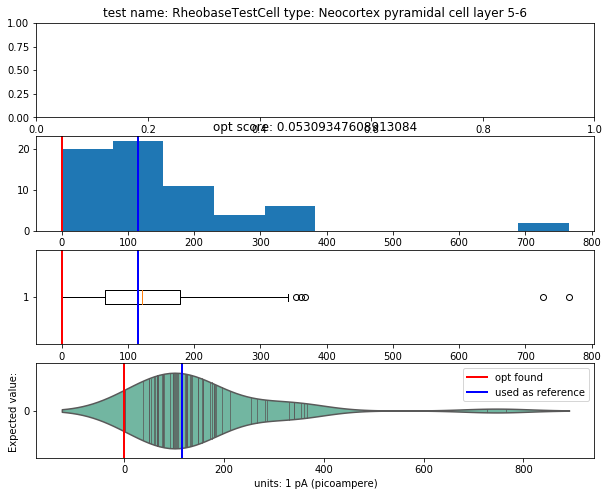

<Figure size 720x576 with 0 Axes>

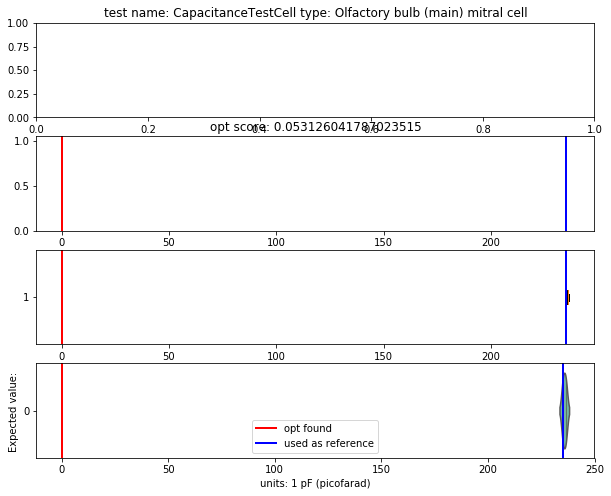

<Figure size 720x576 with 0 Axes>

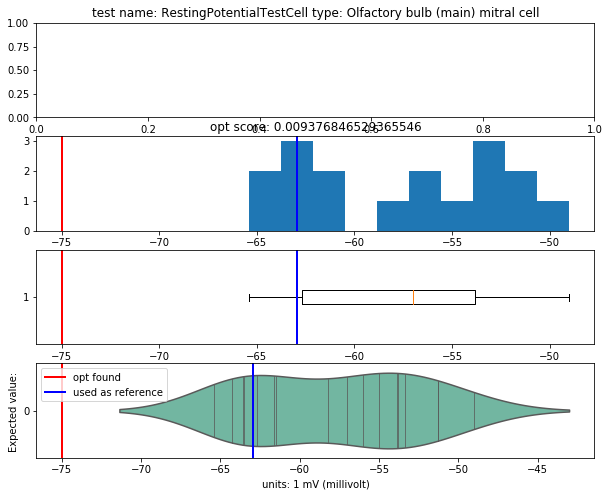

<Figure size 720x576 with 0 Axes>

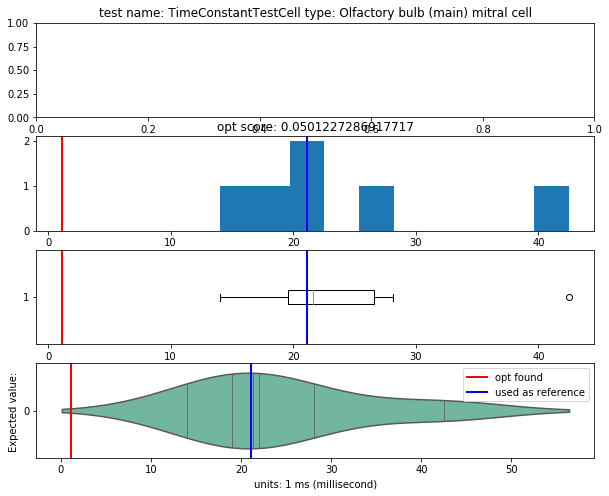

<Figure size 720x576 with 0 Axes>

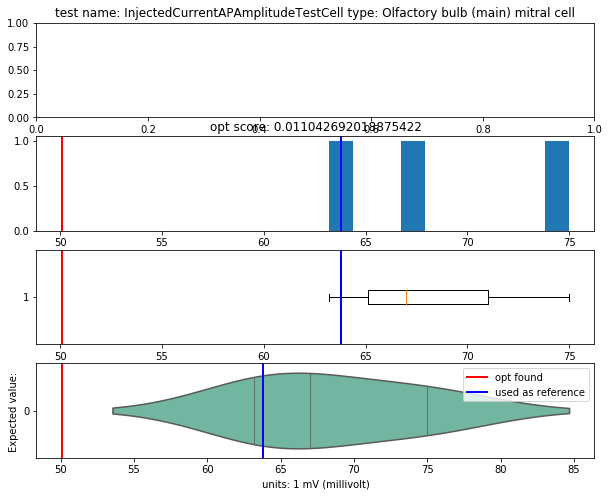

<Figure size 720x576 with 0 Axes>

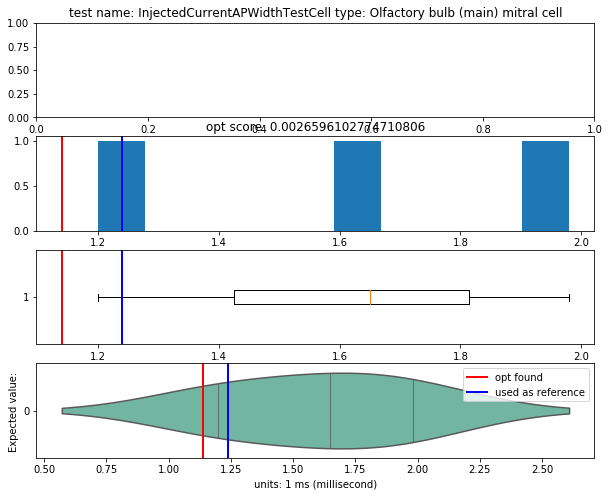

<Figure size 720x576 with 0 Axes>

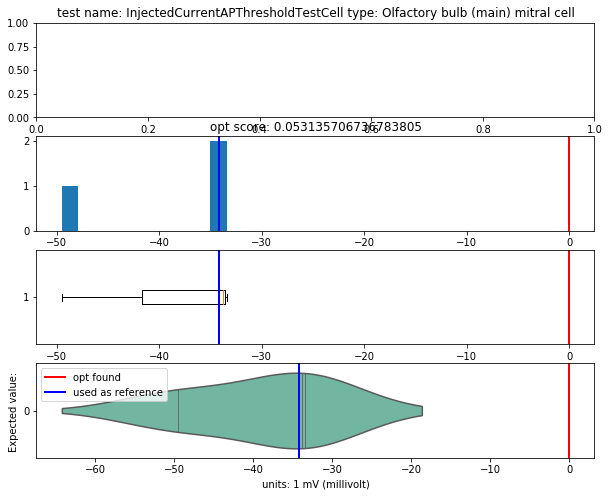

<Figure size 720x576 with 0 Axes>

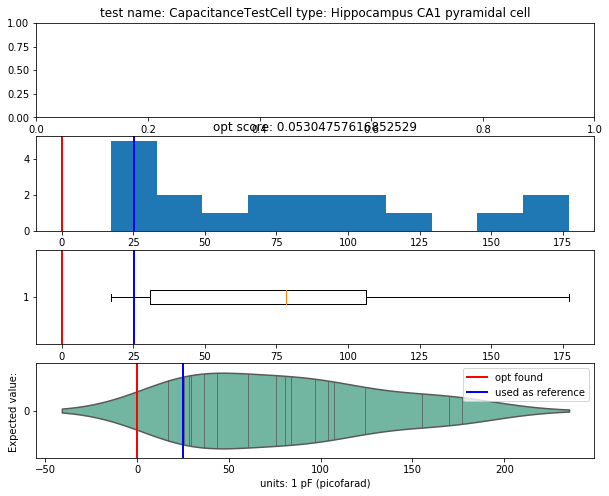

<Figure size 720x576 with 0 Axes>

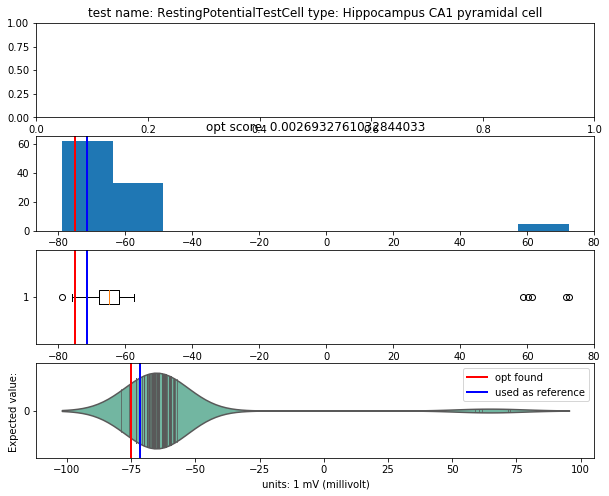

<Figure size 720x576 with 0 Axes>

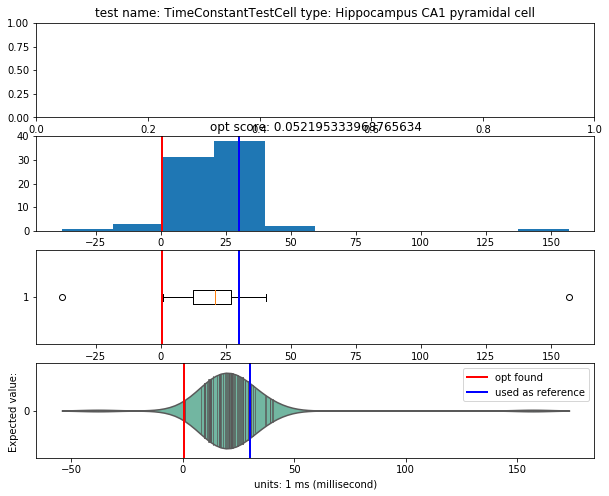

<Figure size 720x576 with 0 Axes>

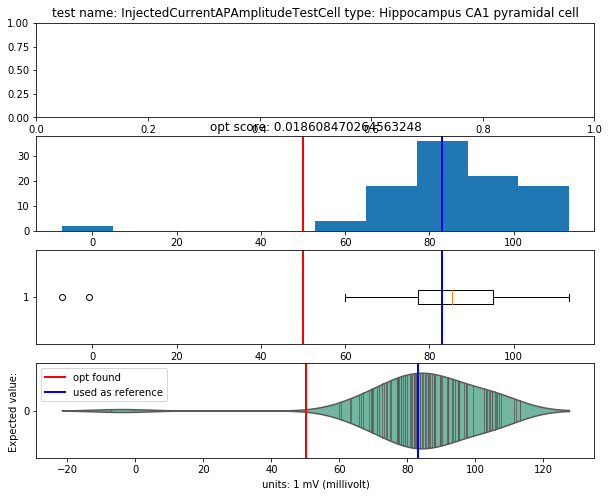

<Figure size 720x576 with 0 Axes>

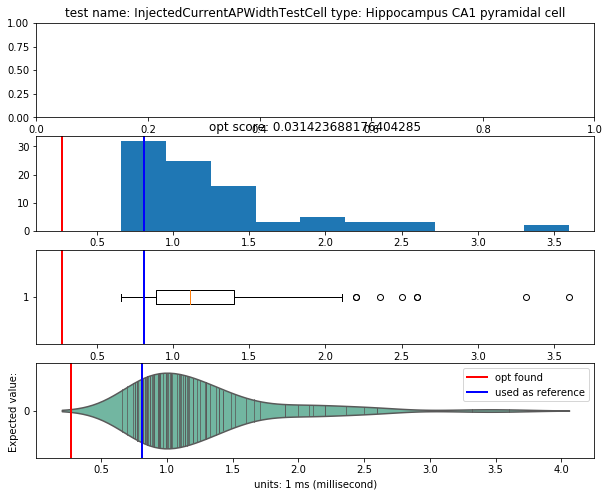

<Figure size 720x576 with 0 Axes>

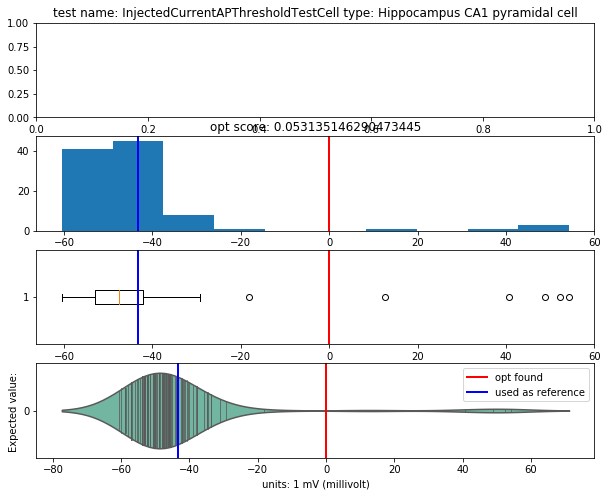

<Figure size 720x576 with 0 Axes>

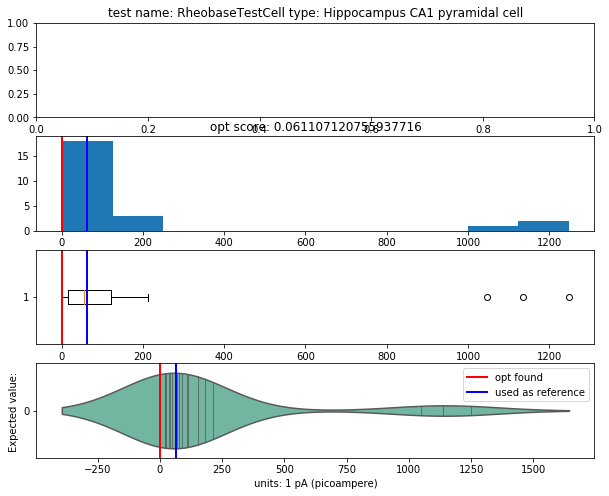

In [10]:
plot_opt_vs_distribution(neuron_values,inv_name_map,executable_tests,RAW_dtc)


In [ ]:
from neuronunit.optimisation import get_neab as gn

# get some mean based tests instead of mode based tests:
conventional_mean_based_tests = gn.get_tests()#backend=str('RAW'))


{'id': 65, 'name': 'Dentate gyrus basket cell', 'neuron_db_id': None, 'nlex_id': 'nlx_cell_100201'}
id {'definition': 'Neuron capacitance, typically measured by dividing membrane time constant by membrane resistance', 'id': 1, 'max_range': 10000.0, 'min_range': 1.0, 'name': 'cell capacitance', 'nlex_id': None, 'norm_criteria': 'Values corrected for differences in units, but are otherwise unchanged. Refer to individual articles for specific definitions and calculation methodologies.', 'plot_transform': 'log10', 'short_name': 'cap', 'units': {'id': 1, 'name': 'F', 'prefix': 'p'}}
> /Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/get_neab.py(41)get_obs()
-> for l in ontologies['objects']:
(Pdb) dir()
['l', 'obs', 'ontologies', 'p', 'pdb', 'pipe', 'url']
(Pdb) obs
[]
(Pdb) p
*** SyntaxError: unexpected EOF while parsing
(Pdb) p p 
'id'
(Pdb) ontologies
{'meta': {'limit': 50, 'next': '/api/1/e/?limit=50&offset=50', 'offset': 0, 'previous': None, 'total_count': 52}, 'objects': [{

(Pdb) url
(Pdb) c
id {'definition': 'Input resistance measured at steady-state voltage response to current injection', 'id': 2, 'max_range': 20000.0, 'min_range': 5.0, 'name': 'input resistance', 'nlex_id': None, 'norm_criteria': 'Values corrected for differences in units, but are otherwise unchanged. Refer to individual articles for specific definitions and calculation methodologies.', 'plot_transform': 'log10', 'short_name': 'rin', 'units': {'id': 2, 'name': 'Ω', 'prefix': 'M'}}
> /Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/get_neab.py(41)get_obs()
-> for l in ontologies['objects']:
(Pdb) c
id {'definition': 'Membrane potential at the onset of whole-cell recording', 'id': 3, 'max_range': -20.0, 'min_range': -150.0, 'name': 'resting membrane potential', 'nlex_id': None, 'norm_criteria': 'Values unchanged from those reported. Refer to individual articles for specific definitions and calculation methodologies.', 'plot_transform': 'linear', 'short_name': 'rmp', 'units': {

(Pdb) c
id {'definition': 'Calculated as the voltage difference between AP threshold and AP trough. Commonly defined using first AP in train at rheobase current.', 'id': 16, 'max_range': 50.0, 'min_range': 0.0, 'name': 'AHP amplitude', 'nlex_id': None, 'norm_criteria': 'Values have been algorithmically standardized to correspond to calculation definition of difference between AP threshold and AHP trough. Since authors use different APs for defining AHP amplitudes (i.e., evoked using rheobase current, via synaptic input, etc.), please refer to individual articles for specific methodology.', 'plot_transform': 'linear', 'short_name': 'ahpamp', 'units': {'id': 3, 'name': 'V', 'prefix': 'm'}}
> /Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/get_neab.py(41)get_obs()
-> for l in ontologies['objects']:
(Pdb) c
id {'definition': 'Slope of the frequency-current relationship', 'id': 17, 'max_range': None, 'min_range': 0.0, 'name': 'FI slope', 'nlex_id': None, 'norm_criteria': 'Values

In [ ]:
conventional_mean_based_tests
ct = {i.name:i for i in conventional_mean_based_tests[1]}
result_RAW['ca1pyr']

from neuronunit.optimisation.optimization_management import WSListIndividual
genes = []
for i in result_RAW['ca1pyr']:
    
    gene = WSListIndividual(list(i.attrs.values()))
    genes.append(gene)
    #print(len(genes[-1]))
ct    

In [ ]:
#%%capture
from neuronunit.optimisation.optimisations import run_ga
from neuronunit.optimisation import model_parameters
from neuronunit.optimisation.optimization_management import TSD

test = TSD(ct)
test.use_rheobase_score = True
backend = str("RAW")
MODEL_PARAMS=model_parameters.MODEL_PARAMS['RAW']

out = run_ga(MODEL_PARAMS, 1, test, \
        free_params = MODEL_PARAMS.keys(), hc = None, MU = len(genes),
           seed_pop = genes, \
           backend = backend, protocol={'use_rheobase_score':True,'allen':False,'elephant':True})

filtered_tests.keys()
out